In [1]:
# Capstone Project Problem Statement: Predicting Customer Purchase Behavior for Bright Motor Company
### Business Context:
# Bright Motor Company is looking to optimize its sales strategy by understanding the profiles of individuals likely to purchase their vehicles. They also want to price their products more effectively based on the customer’s profile and financial background.
# The company has collected data from previous inquiries and purchases, which includes demographic, professional, and financial attributes of individuals who interacted with their dealership. This information will be used to analyze customer behavior, predict the likelihood of a purchase, and estimate the optimal product pricing strategy.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv('bright_automotive_company.csv')
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [5]:
df.shape

(1581, 14)

In [6]:
# observations
# 1. the dataset is having 14 columns and 1581 rows.
# 2. there are missing entries.
# 3. the datatype of "no of departments" feature need to be check.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [8]:
# observations
# 1. partners of few customers may be home maker and not doing jobs.
# 2. we need to check the record where age is 120.
# 3. we need to check the record where age is 14.

In [9]:

df[df['Age']==120]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
18,120,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.0,162900,58000,SUV


In [10]:
df[df['Age']<23]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
414,14,Male,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,80600.0,40500.0,121100,43000,Sedan
1487,22,Male,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,56100.0,45200.0,101300,20000,Sedan
1488,22,Male,Salaried,Married,Post Graduate,4,Yes,No,Yes,60200.0,40800.0,101000,27000,Sedan
1489,22,NaN,Salaried,Married,Post Graduate,3,No,No,Yes,55900.0,45500.0,101400,19000,Sedan
1490,22,Male,Business,Married,Post Graduate,4,No,No,Yes,59600.0,40100.0,99700,30000,Hatchback
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback


In [11]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [12]:
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [13]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [14]:
df['Profession'].value_counts()

Profession
Salaried    890
Business    685
Name: count, dtype: int64

In [15]:
df['Marital_status'].value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

In [16]:

for i in df.select_dtypes('object').columns:
  print(df[i].value_counts())
  print("----------------------------")

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64
----------------------------
Profession
Salaried    890
Business    685
Name: count, dtype: int64
----------------------------
Marital_status
Married    1443
Single      138
Name: count, dtype: int64
----------------------------
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
----------------------------
No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64
----------------------------
Personal_loan
Yes    792
No     789
Name: count, dtype: int64
----------------------------
House_loan
No     1054
Yes     527
Name: count, dtype: int64
----------------------------
Partner_working
Yes    868
No     713
Name: count, dtype: int64
----------------------------
Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64
----------------------------


In [17]:
# observations:
# 1. in gender column there are two wrong entities in female spelling.
# 2. in no of dependents there are two ?.
# 3. in make feature there are two ?.

In [18]:
df.duplicated().sum()

0

In [19]:

# observation: there are no duplicate rows.

In [20]:

df[df.duplicated()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [21]:
# columnwise null values
df.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [22]:
# percentagewise null values
df.isnull().sum()/len(df)*100

Age                 0.000000
Gender              3.352309
Profession          0.379507
Marital_status      0.000000
Education           0.000000
No_of_Dependents    0.000000
Personal_loan       0.000000
House_loan          0.000000
Partner_working     0.000000
Salary              0.822264
Partner_salary      6.704617
Total_salary        0.000000
Price               0.000000
Make                0.000000
dtype: float64

In [23]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       1
       ..
1576    0
1577    1
1578    0
1579    1
1580    0
Length: 1581, dtype: int64

In [24]:
df.isnull().sum(axis=1).sort_values(ascending=False)

571     2
1467    2
1155    2
327     1
1244    1
       ..
561     0
560     0
559     0
558     0
1580    0
Length: 1581, dtype: int64

In [25]:
# observations:
#1. there is no duplicate values.

In [26]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

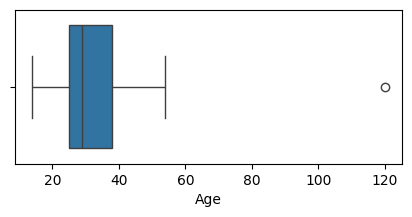

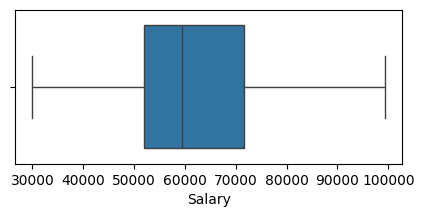

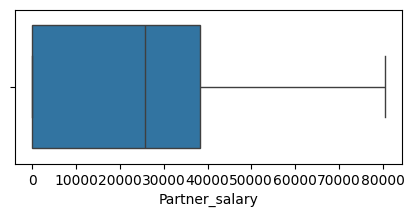

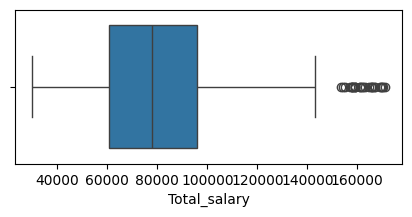

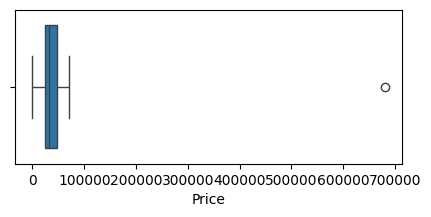

In [27]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)


In [28]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  Age : 1
-----------------------
Number of ouliers in  Salary : 0
-----------------------
Number of ouliers in  Partner_salary : 0
-----------------------
Number of ouliers in  Total_salary : 27
-----------------------
Number of ouliers in  Price : 1
-----------------------


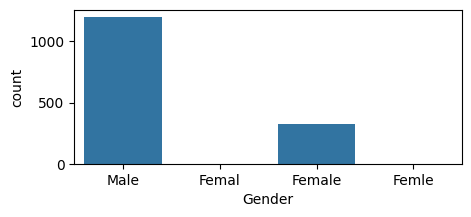

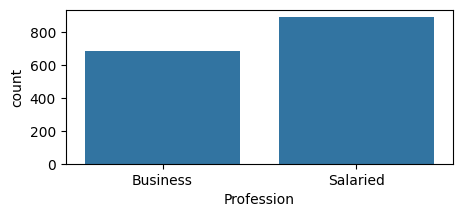

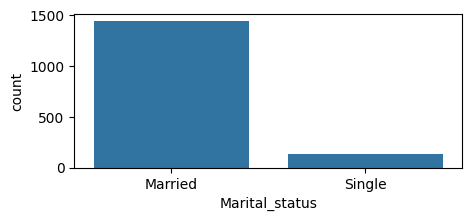

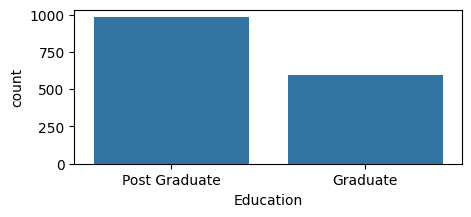

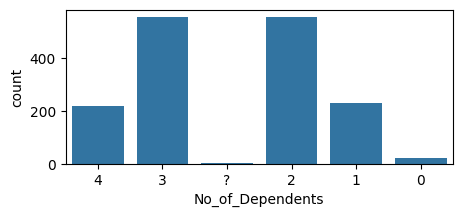

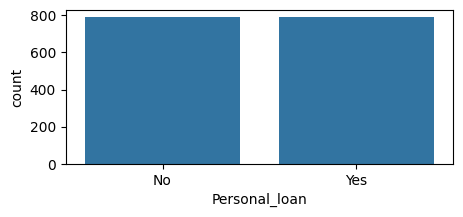

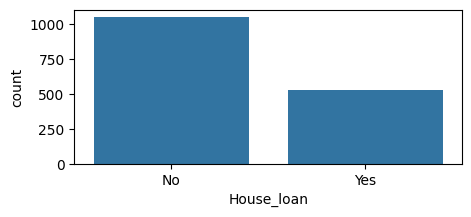

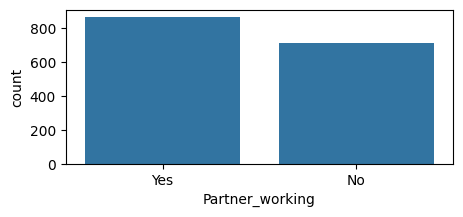

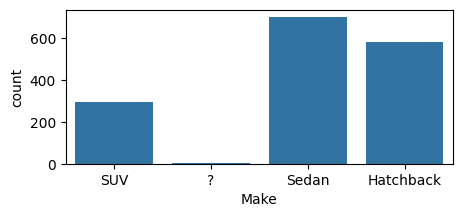

In [29]:
for i in cat_variables.columns:
    plt.figure(figsize=(5,2))
    sns.countplot(data=df,x=i)
    plt.show()

In [30]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

4
Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64
-------------
2
Profession
Salaried    890
Business    685
Name: count, dtype: int64
-------------
2
Marital_status
Married    1443
Single      138
Name: count, dtype: int64
-------------
2
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
-------------
6
No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64
-------------
2
Personal_loan
Yes    792
No     789
Name: count, dtype: int64
-------------
2
House_loan
No     1054
Yes     527
Name: count, dtype: int64
-------------
2
Partner_working
Yes    868
No     713
Name: count, dtype: int64
-------------
4
Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64
-------------


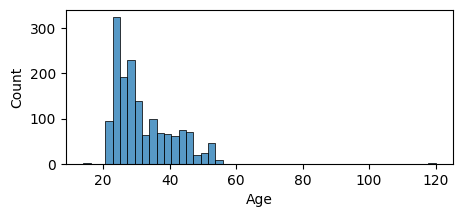

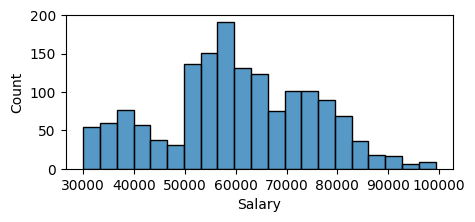

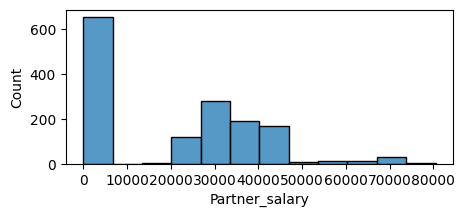

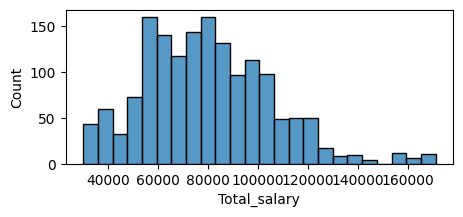

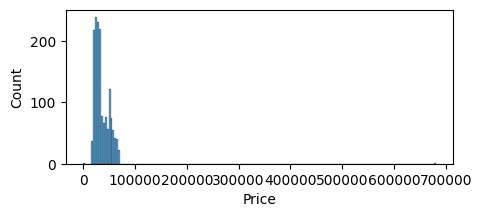

In [31]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.histplot(data=df,x=i);

In [32]:
# observations:
# 1. Highest correlation is between Total_salary and Partner_salary.
# 2. The highest correlation of Price is with Age, which is low.

In [33]:
for i in cat_variables.columns:
    print(i)
    print(df.groupby(i)['Price'].mean())
    print('--------------------')

Gender
Gender
Femal     61000.000000
Female    49305.987768
Femle     65000.000000
Male      32817.347790
Name: Price, dtype: float64
--------------------
Profession
Profession
Business    33353.284672
Salaried    37803.435955
Name: Price, dtype: float64
--------------------
Marital_status
Marital_status
Married    36184.378378
Single     33478.260870
Name: Price, dtype: float64
--------------------
Education
Education
Graduate         35907.718121
Post Graduate    35972.647716
Name: Price, dtype: float64
--------------------
No_of_Dependents
No_of_Dependents
0    28900.000000
1    42393.013100
2    36571.942446
3    32093.461400
4    37861.751152
?    61000.000000
Name: Price, dtype: float64
--------------------
Personal_loan
Personal_loan
No     37444.940431
Yes    34457.070707
Name: Price, dtype: float64
--------------------
House_loan
House_loan
No     38233.451613
Yes    31377.609108
Name: Price, dtype: float64
--------------------
Partner_working
Partner_working
No     35918.7349

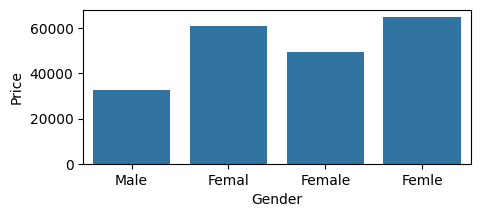

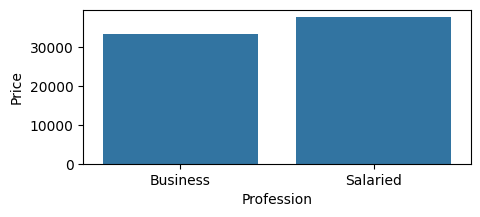

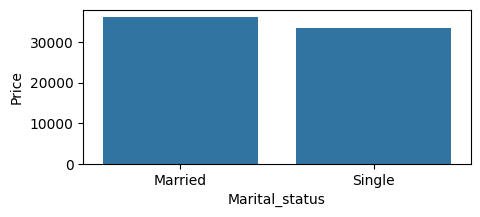

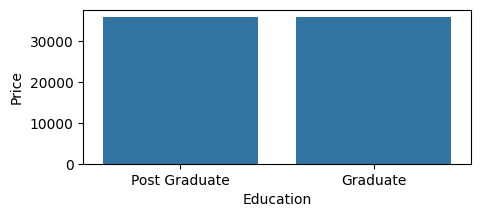

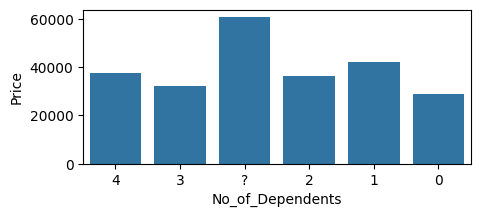

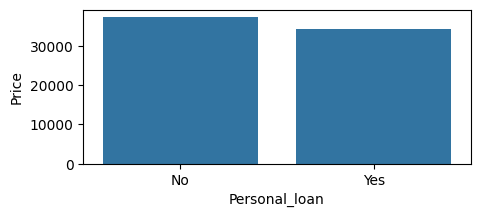

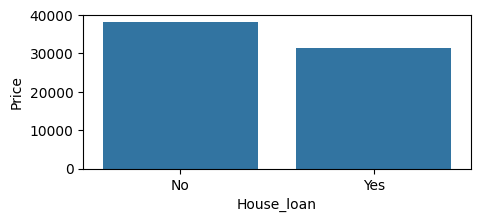

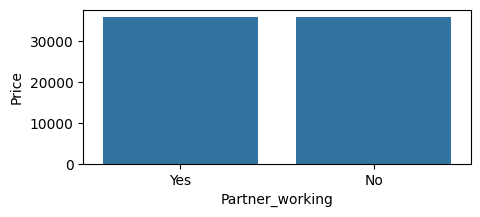

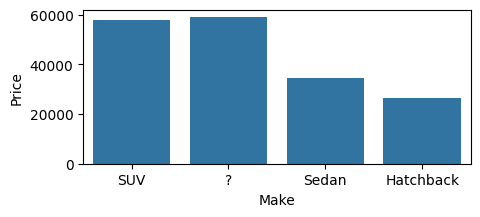

In [34]:
# barplots for Price vs all other categorical variables
for i in cat_variables.columns:
    plt.figure(figsize=(5,2))
    sns.barplot(data=df, y='Price',x=i,errorbar=None);

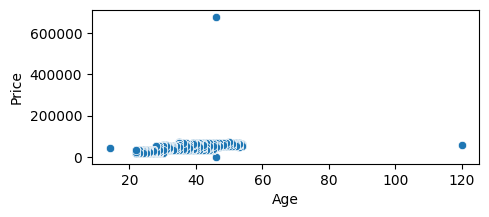

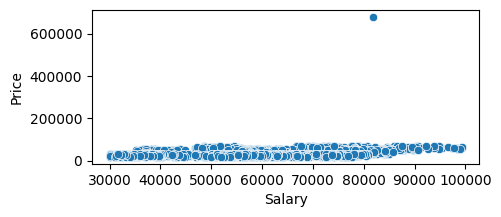

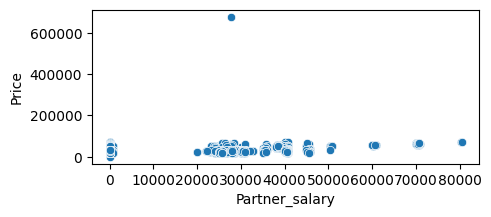

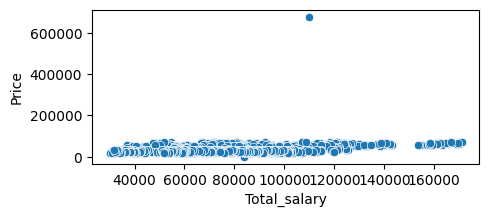

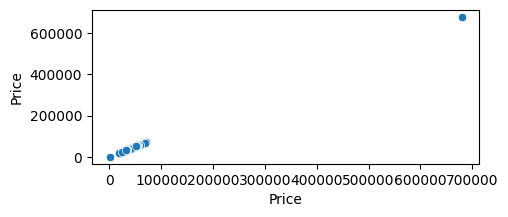

In [35]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=df, y='Price',x=i);

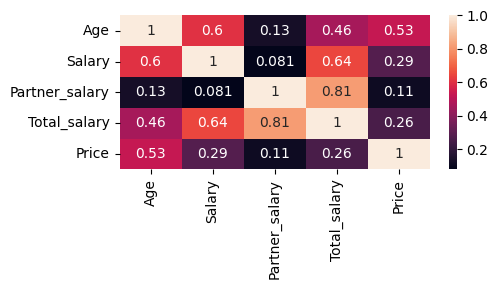

In [36]:
corr= num_variables.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

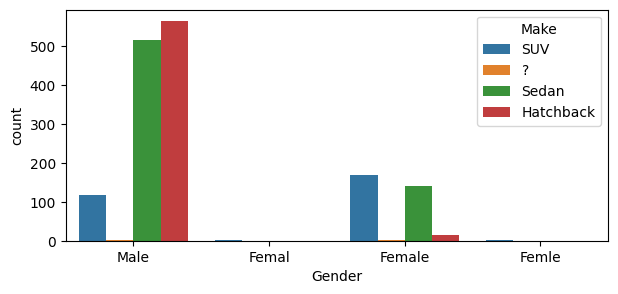

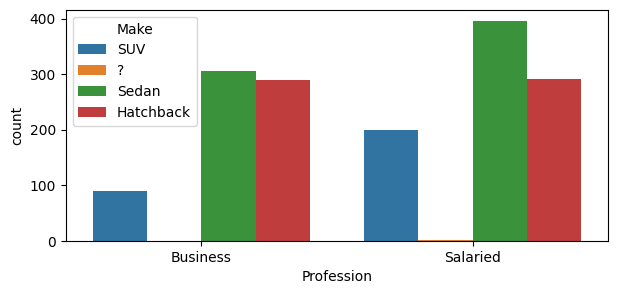

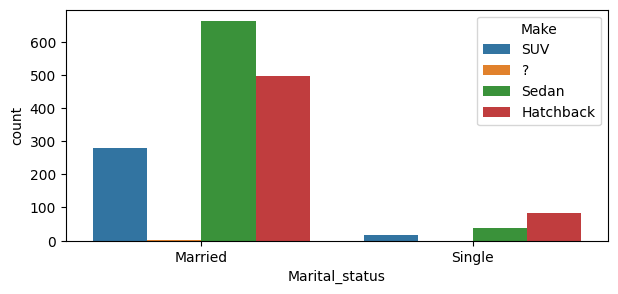

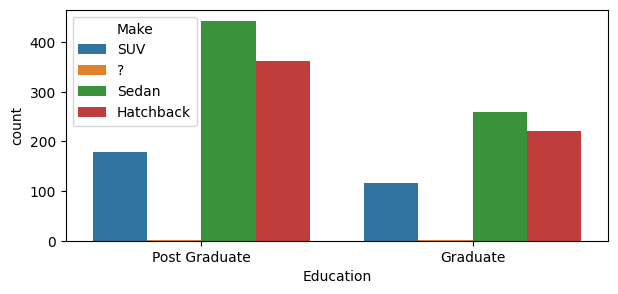

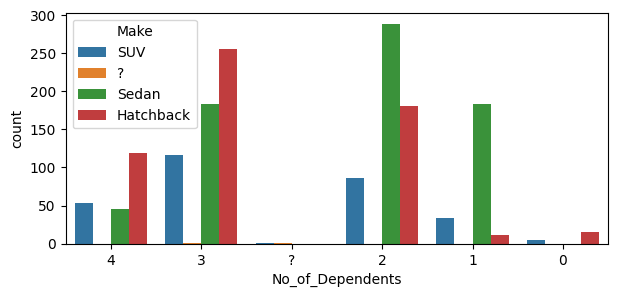

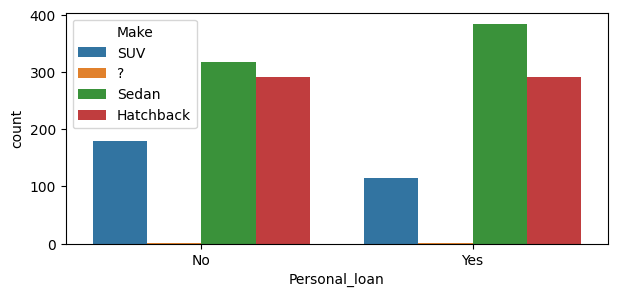

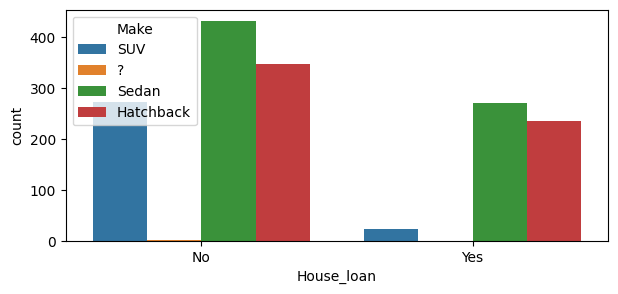

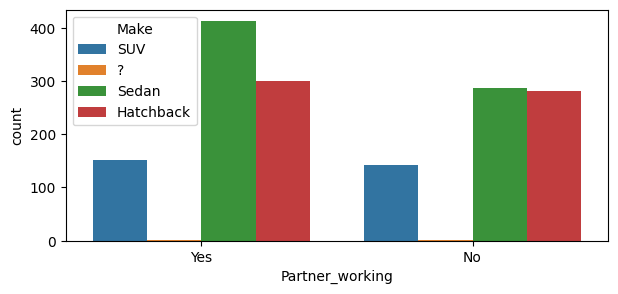

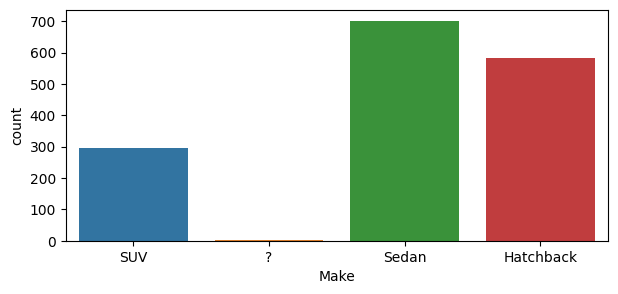

In [37]:
for i in cat_variables.columns:
    plt.figure(figsize=(7,3))
    sns.countplot(data=df, x=i, hue='Make');

In [38]:
for i in cat_variables:
    print(pd.crosstab(df['Make'],df[i]))
    print('------------------------------')

Gender     Femal  Female  Femle  Male
Make                                 
?              0       1      0     1
Hatchback      0      15      0   565
SUV            1     170      1   117
Sedan          0     141      0   516
------------------------------
Profession  Business  Salaried
Make                          
?                  0         2
Hatchback        290       292
SUV               89       200
Sedan            306       396
------------------------------
Marital_status  Married  Single
Make                           
?                     2       0
Hatchback           498      84
SUV                 279      16
Sedan               664      38
------------------------------
Education  Graduate  Post Graduate
Make                              
?                 1              1
Hatchback       220            362
SUV             116            179
Sedan           259            443
------------------------------
No_of_Dependents   0    1    2    3    4  ?
Make            

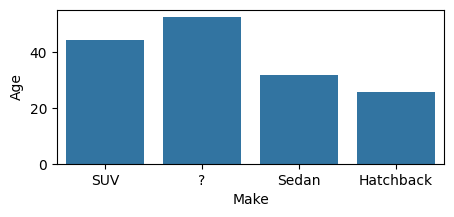

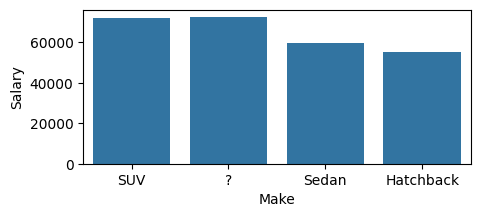

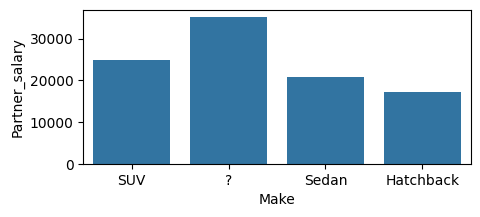

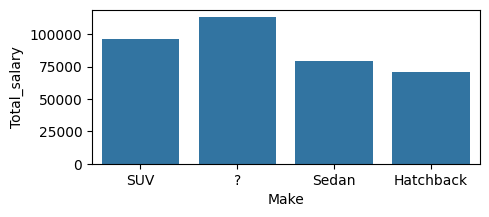

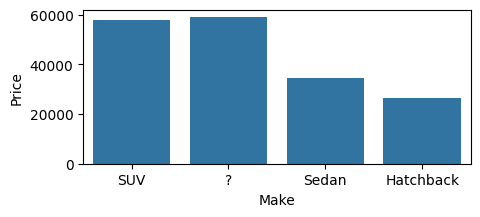

In [39]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.barplot(data=df, x='Make', y=i,errorbar= None);

In [40]:
for i in num_variables.columns:
    print(i)
    print(df.groupby('Make')[i].mean())
    print('--------------------')

Age
Make
?            52.500000
Hatchback    25.726804
SUV          44.172881
Sedan        31.920228
Name: Age, dtype: float64
--------------------
Salary
Make
?            72500.000000
Hatchback    55083.505155
SUV          72114.436620
Sedan        59775.463623
Name: Salary, dtype: float64
--------------------
Partner_salary
Make
?            35150.000000
Hatchback    17100.373134
SUV          24845.161290
Sedan        20767.173252
Name: Partner_salary, dtype: float64
--------------------
Total_salary
Make
?            113250.000000
Hatchback     71018.041237
SUV           96478.644068
Sedan         79584.757835
Name: Total_salary, dtype: float64
--------------------
Price
Make
?            59000.000000
Hatchback    26474.226804
SUV          57681.552542
Sedan        34603.988604
Name: Price, dtype: float64
--------------------


# Data Cleaning

In [41]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

In [42]:
print(" No. of rows before dropping duplicates :", df_copy.shape[0])
df_copy.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", df_copy.shape[0])

 No. of rows before dropping duplicates : 1581
 No. of rows after dropping duplicates : 1581


# 3.2.1 Gender

In [43]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['Gender'].unique())
print("Number of Unique categories in feature : ",df_copy['Gender'].nunique())
print("Count of Unique categories in feature : ",df_copy['Gender'].value_counts())

Unique categories in feature :  ['Male' 'Femal' 'Female' nan 'Femle']
Number of Unique categories in feature :  4
Count of Unique categories in feature :  Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64


In [44]:
# Replacing wrong entries
df_copy['Gender']=df_copy['Gender'].replace(['Femal','Femle'],'Female')

In [45]:
# After cleaning
print("Unique categories in feature : ",df_copy['Gender'].unique())
print("Number of Unique categories in feature : ",df_copy['Gender'].nunique())
print("Count of Unique categories in feature : ",df_copy['Gender'].value_counts())

Unique categories in feature :  ['Male' 'Female' nan]
Number of Unique categories in feature :  2
Count of Unique categories in feature :  Gender
Male      1199
Female     329
Name: count, dtype: int64


# 3.2.2 Make

In [46]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['Make'].unique())
print("Number of Unique categories in feature : ",df_copy['Make'].nunique())
print("Count of Unique categories in feature : ",df_copy['Make'].value_counts())

Unique categories in feature :  ['SUV' '?' 'Sedan' 'Hatchback']
Number of Unique categories in feature :  4
Count of Unique categories in feature :  Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64


In [47]:
# Fetching the records where Make is "?"
df_copy[df_copy['Make']=='?']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,NaN,0.0,83700,57000,?


In [48]:
# Replacing wrong entries
df_copy['Make']=df_copy['Make'].replace('?',df_copy['Make'].mode()[0])

In [49]:
# After Cleaning
print("Unique categories in feature : ",df_copy['Make'].unique())
print("Number of Unique categories in feature : ",df_copy['Make'].nunique())
print("Count of Unique categories in feature : ",df_copy['Make'].value_counts())

Unique categories in feature :  ['SUV' 'Sedan' 'Hatchback']
Number of Unique categories in feature :  3
Count of Unique categories in feature :  Make
Sedan        704
Hatchback    582
SUV          295
Name: count, dtype: int64


In [50]:
df_copy['Make'].value_counts()

Make
Sedan        704
Hatchback    582
SUV          295
Name: count, dtype: int64

In [51]:
df_copy[df_copy['Make']=='?']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [52]:
df_copy.iat[3,13]= 'Sedan'

In [53]:
df_copy.iat[14,13]='Hatchback'

# 3.2.3 Replacing wrong entries in No_of_Dependents

In [54]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['No_of_Dependents'].unique())
print("Number of Unique categories in feature : ",df_copy['No_of_Dependents'].nunique())
print("Count of Unique categories in feature : ",df_copy['No_of_Dependents'].value_counts())

Unique categories in feature :  ['4' '3' '?' '2' '1' '0']
Number of Unique categories in feature :  6
Count of Unique categories in feature :  No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64


In [55]:
# Fetching the rows with wrong entries
df_copy[df_copy['No_of_Dependents']=='?']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,Sedan
8,52,Male,Salaried,Married,Post Graduate,?,No,No,No,89400.0,0.0,89400,61000,SUV


In [56]:
# Mean of 'No_of_Dependents'
df_copy['No_of_Dependents'].drop(index=[3,8],axis=1).astype('int').mean()

2.4572514249525015

In [57]:
# Median of 'No_of_Dependents'
df_copy['No_of_Dependents'].drop(index=[3,8],axis=1).astype('int').median()

2.0

In [58]:
# Mode of 'No_of_Dependents'
df_copy['No_of_Dependents'].drop(index=[3,8],axis=1).astype('int').mode()

0    3
Name: No_of_Dependents, dtype: int32

In [59]:
# Replacing with mode
df_copy['No_of_Dependents']=df_copy['No_of_Dependents'].replace('?','3')
df_copy['No_of_Dependents']=df_copy['No_of_Dependents'].astype('int')

In [60]:
# After cleaning
df_copy['No_of_Dependents'].value_counts()

No_of_Dependents
3    559
2    556
1    229
4    217
0     20
Name: count, dtype: int64

# Null Values Treatment general guidelines:
# 1. check the datatype of feature:
 #   if datatype== categorical ; replace null values with mode
 #   if datatype== numnerical:
 #   check for outliers:
#     if outliers are present, replace null values with median
#     if outliers are not present

In [61]:
df.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [62]:
# Filling null values using fillna- Gender, Salary
df_copy['Gender'].mode()[0]

'Male'

In [63]:
df_copy['Gender'] = df_copy['Gender'].fillna(df_copy['Gender'].mode()[0])

In [64]:
df_copy.isnull().sum()

Age                   0
Gender                0
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

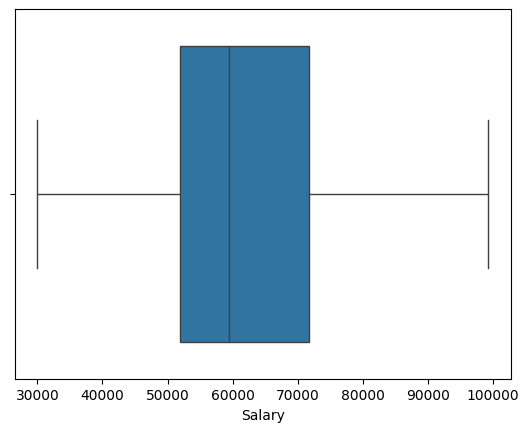

In [65]:
sns.boxplot(data=df_copy, x='Salary');

In [66]:
df_copy['Salary'] = df_copy['Salary'].fillna(df_copy['Salary'].mean())

In [67]:
df_copy.isnull().sum()

Age                   0
Gender                0
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [68]:
from sklearn.impute import SimpleImputer
# Imputer with mode strategy
imputer = SimpleImputer(strategy='most_frequent')
df_copy[['Profession']] = imputer.fit_transform(df_copy[['Profession']])

In [69]:
df_copy.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

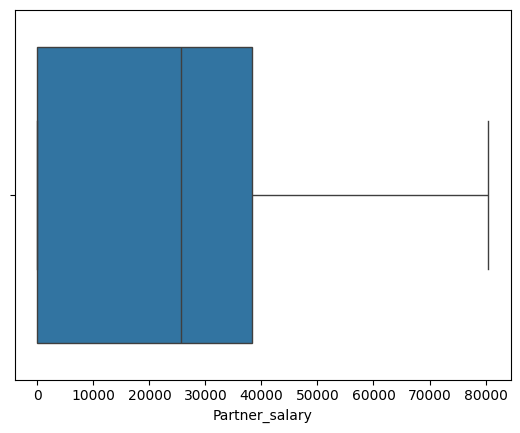

In [70]:
sns.boxplot(data=df, x='Partner_salary');

In [71]:
# Imputer with median strategy
imputer = SimpleImputer(strategy='mean')
df_copy[['Partner_salary']] = imputer.fit_transform(df_copy[['Partner_salary']])

In [72]:
df_copy.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [73]:
df_copy.to_csv('df_copy1.csv',index=False)

# 3.4 Outliers Treatment



In [74]:
df_copy2= pd.read_csv('df_copy1.csv')

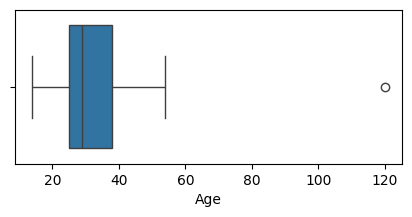

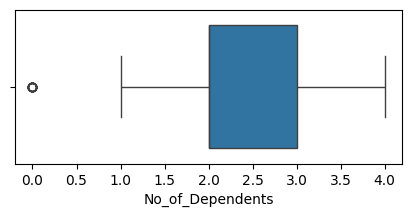

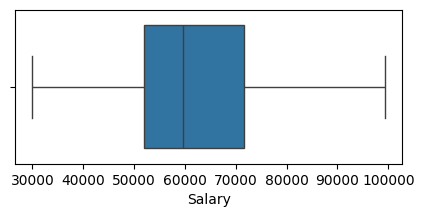

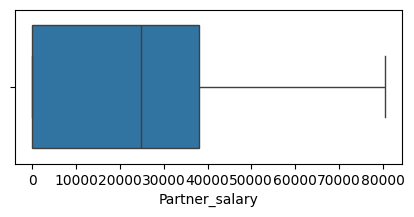

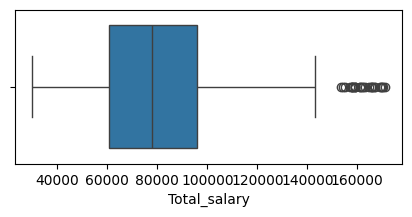

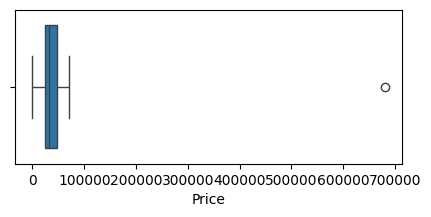

In [75]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df_copy2,x=i);

# A.IQR Method (Interquartile Range)

In [76]:
# A.IQR Method (Interquartile Range)
Q1 = df_copy2['Age'].quantile(0.25)
Q3 = df_copy2['Age'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(5.5, 57.5)

# Filter out outliers

In [77]:
# Filter out outliers
df_copy2[(df_copy2['Age'] <= lower) | (df_copy2['Age'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
18,120,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.0,162900,58000,SUV


In [78]:
df_copy2['Age'].quantile(0.99)

53.0

In [79]:
df_copy2['Age'].describe()

count    1581.000000
mean       31.952562
std         8.712549
min        14.000000
25%        25.000000
50%        29.000000
75%        38.000000
max       120.000000
Name: Age, dtype: float64

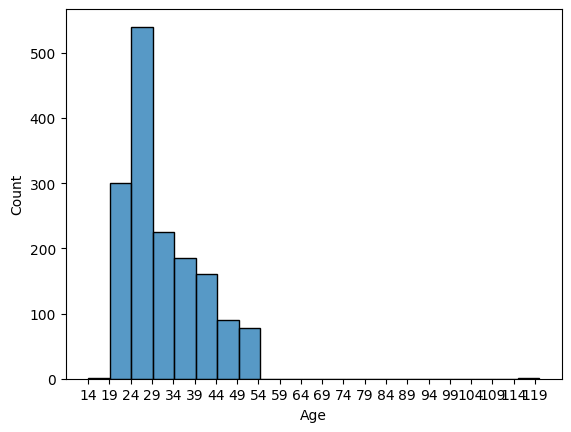

In [80]:
sns.histplot(data=df_copy2, x='Age',binwidth=5)
plt.xticks(np.arange(14,120,5));

In [81]:
df_copy2['Age'] =np.where(df_copy2['Age']<= lower,df_copy2['Age'].median(),df_copy2['Age'])
df_copy2['Age'] =np.where(df_copy2['Age']>= upper,df_copy2['Age'].median(),df_copy2['Age'])

In [82]:
 df_copy2[(df_copy2['Age'] <= lower) | (df_copy2['Age'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


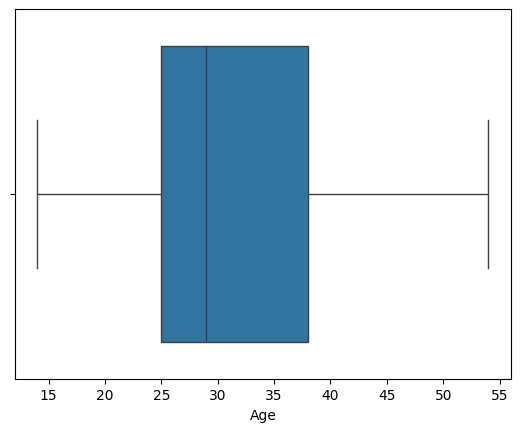

In [83]:
sns.boxplot(data=df_copy2, x='Age');

# Note - We lately found a datapoint where age is 14 and this is not getting detected during outliers treatment. So we need to treat 'Age" manually here.

In [84]:
df_copy2['Age'] =np.where(df_copy2['Age'] ==14,29,df_copy2['Age'])

# B. Z-Score Method

In [85]:
# B. Z-Score Method
from scipy.stats import zscore
df_copy2['zscore'] = zscore(df_copy2['Price'])
df_copy2[df_copy2['zscore'].abs() > 3]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,zscore
26,46.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,81900.0,27800.0,109700,680000,SUV,30.42499


In [86]:
df_copy2['Price'].describe()

count      1581.000000
mean      35948.170778
std       21175.212108
min          58.000000
25%       25000.000000
50%       31000.000000
75%       47000.000000
max      680000.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

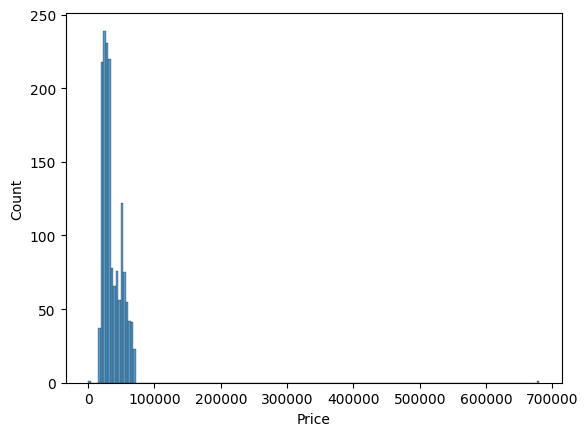

In [87]:
sns.histplot(data=df_copy2, x='Price')
#plt.xticks(np.arange(58,680000,1000));

In [88]:
df_copy2['Price'] =np.where(df_copy2['zscore'].abs()>3,df_copy2['Price'].median(),df_copy2['Price'])

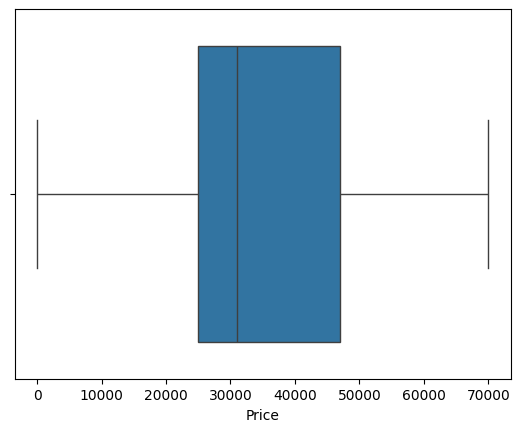

In [89]:
sns.boxplot(data=df_copy2, x='Price');

In [90]:
#Note- There is a value in price ==58 whcih is not detected
#during outliers treatment so we will replace this with median
df_copy2['Price'] =np.where(df_copy2['Price']==58,df_copy2['Price'].median(),df_copy2['Price'])

In [91]:
# Treating outliers in Total_salary
Q1 = df_copy2['Total_salary'].quantile(0.25)
Q3 = df_copy2['Total_salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(7400.0, 149000.0)

In [92]:
df_copy2[(df_copy2['Total_salary'] <= lower) | (df_copy2['Total_salary'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,zscore
0,53.0,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.000000,170000,61000.0,SUV,1.183448
1,53.0,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.000000,165800,61000.0,SUV,1.183448
2,53.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.000000,158000,57000.0,SUV,0.994488
17,49.0,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100.0,70600.000000,165700,64000.0,SUV,1.325168
18,29.0,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.000000,162900,58000.0,SUV,1.041728
19,49.0,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400.0,60600.000000,159000,54000.0,SUV,0.852768
29,46.0,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300.0,70700.000000,169000,61000.0,SUV,1.183448
30,46.0,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900.0,70700.000000,165600,67000.0,SUV,1.466888
31,46.0,Male,Business,Married,Graduate,2,Yes,No,Yes,91100.0,70000.000000,161100,66000.0,SUV,1.419648
41,53.0,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600.0,70300.000000,166900,66000.0,SUV,1.419648


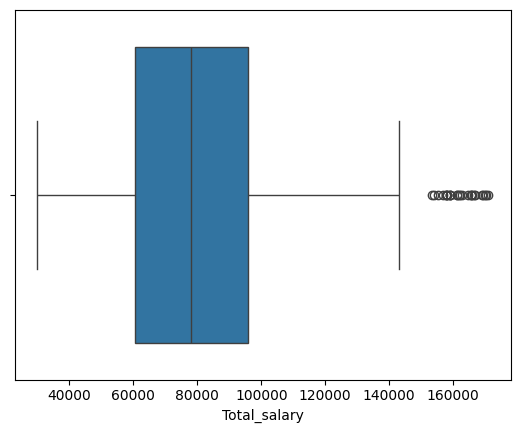

In [93]:
sns.boxplot(data=df_copy2, x='Total_salary');

In [94]:
df_copy2['Total_salary'] =np.where(df_copy2['Total_salary'] <= lower,lower,df_copy2['Total_salary'])
df_copy2['Total_salary'] =np.where(df_copy2['Total_salary'] >= upper,upper,df_copy2['Total_salary'])

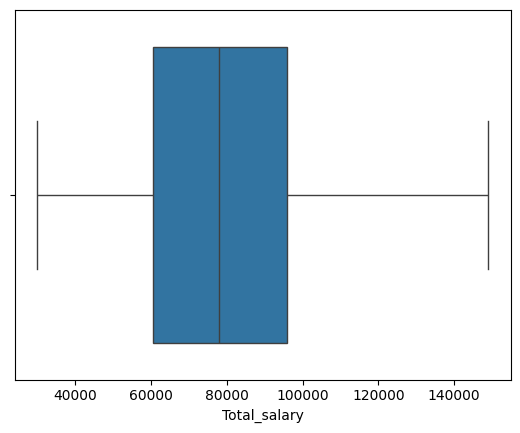

In [95]:
sns.boxplot(data=df_copy2, x='Total_salary');

In [96]:
df_copy2.drop('zscore',axis=1, inplace=True)
df_copy2.to_csv('df_copy3.csv', index=False)

## 3.5 Encoding

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [97]:
df_3= pd.read_csv('df_copy3.csv')

In [98]:
df_3.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53.0,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,149000.0,61000.0,SUV
1,53.0,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,149000.0,61000.0,SUV
2,53.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,149000.0,57000.0,SUV
3,53.0,Female,Salaried,Married,Graduate,3,Yes,No,Yes,72500.0,70300.0,142800.0,61000.0,Sedan
4,53.0,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900.0,57000.0,SUV


In [99]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])


In [100]:
cat_variables.columns

Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make'],
      dtype='object')

In [101]:
cat_variables.head()

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV
3,Female,Salaried,Married,Graduate,Yes,No,Yes,Sedan
4,Male,Salaried,Married,Post Graduate,No,No,Yes,SUV


* Nominal features with low cardinality ===>> Gender, Profession, Marital_status,Personal_loan,House_loan,Partner_working,Make
* Nominal features with high cardinality ===>>
* Ordinal features ===>> Education

In [102]:
pd.Categorical(cat_variables['Education'],ordered= True,categories=['Graduate','Post Graduate'])

['Post Graduate', 'Post Graduate', 'Post Graduate', 'Graduate', 'Post Graduate', ..., 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate']
Length: 1581
Categories (2, object): ['Graduate' < 'Post Graduate']

In [103]:
pd.Categorical(cat_variables['Education'],ordered= True).codes

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [104]:
# 1. Ordinal encoding
print(pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']))
print(pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']).codes)
cat_variables['Education']=pd.Categorical(cat_variables['Education'],ordered= False).codes

['Post Graduate', 'Post Graduate', 'Post Graduate', 'Graduate', 'Post Graduate', ..., 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate']
Length: 1581
Categories (2, object): ['Graduate' < 'Post Graduate']
[1 1 1 ... 0 0 0]


In [105]:
cat_variables['Education'].value_counts()

Education
1    985
0    596
Name: count, dtype: int64

In [106]:
cat_variables.head()

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,Married,1,No,No,Yes,SUV
1,Female,Salaried,Married,1,Yes,No,Yes,SUV
2,Female,Salaried,Married,1,No,No,Yes,SUV
3,Female,Salaried,Married,0,Yes,No,Yes,Sedan
4,Male,Salaried,Married,1,No,No,Yes,SUV


In [107]:
pd.Categorical(cat_variables["Marital_status"],ordered= False).codes

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [108]:
# 2. Nominal encoding
nominal_features=['Marital_status','Personal_loan','House_loan','Partner_working','Make']
for i in nominal_features:
    print(i,";")
    print(pd.Categorical(cat_variables[i],ordered= False))
    print(pd.Categorical(cat_variables[i],ordered= False).codes)
    print('----------------------------------------')
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

Marital_status ;
['Married', 'Married', 'Married', 'Married', 'Married', ..., 'Single', 'Married', 'Single', 'Married', 'Married']
Length: 1581
Categories (2, object): ['Married', 'Single']
[0 0 0 ... 1 0 0]
----------------------------------------
Personal_loan ;
['No', 'Yes', 'No', 'Yes', 'No', ..., 'No', 'No', 'No', 'Yes', 'No']
Length: 1581
Categories (2, object): ['No', 'Yes']
[0 1 0 ... 0 1 0]
----------------------------------------
House_loan ;
['No', 'No', 'No', 'No', 'No', ..., 'Yes', 'No', 'Yes', 'Yes', 'No']
Length: 1581
Categories (2, object): ['No', 'Yes']
[0 0 0 ... 1 1 0]
----------------------------------------
Partner_working ;
['Yes', 'Yes', 'Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No', 'No', 'No']
Length: 1581
Categories (2, object): ['No', 'Yes']
[1 1 1 ... 0 0 0]
----------------------------------------
Make ;
['SUV', 'SUV', 'SUV', 'Sedan', 'SUV', ..., 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback']
Length: 1581
Categories (3, object): ['Hatchback',

In [109]:
cat_variables["Make"].value_counts()

Make
2    704
0    583
1    294
Name: count, dtype: int64

In [110]:
df_3["Make"].value_counts()

Make
Sedan        704
Hatchback    583
SUV          294
Name: count, dtype: int64

In [111]:
pd.get_dummies(cat_variables[['Gender']],dtype='int')

,Gender_Female,Gender_Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1576,0,1
1577,0,1
1578,0,1
1579,0,1


In [112]:
# 3. One Hot encoding
pd.get_dummies(cat_variables[['Gender','Profession']],dtype='int')

,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,0,1,1,0
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,1,0,1
...,...,...,...,...
1576,0,1,0,1
1577,0,1,1,0
1578,0,1,1,0
1579,0,1,1,0


In [113]:
for i in ['Gender','Profession']:
    print(pd.get_dummies(cat_variables[i],dtype='int'))

      Female  Male
0          0     1
1          1     0
2          1     0
3          1     0
4          0     1
...      ...   ...
1576       0     1
1577       0     1
1578       0     1
1579       0     1
1580       0     1

[1581 rows x 2 columns]
      Business  Salaried
0            1         0
1            0         1
2            0         1
3            0         1
4            0         1
...        ...       ...
1576         0         1
1577         1         0
1578         1         0
1579         1         0
1580         0         1

[1581 rows x 2 columns]


In [114]:
cat_variables.head(2)

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,0,1,0,0,1,1
1,Female,Salaried,0,1,1,0,1,1


In [115]:
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['Gender','Profession'], dtype=int)

In [116]:
cat_variables_encoded.head()

,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,0,1,0,0,1,1,0,1,1,0
1,0,1,1,0,1,1,1,0,0,1
2,0,1,0,0,1,1,1,0,0,1
3,0,0,1,0,1,2,1,0,0,1
4,0,1,0,0,1,1,0,1,0,1


In [117]:
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,53.0,4,99300.0,70700.0,149000.0,61000.0,0,1,0,0,1,1,0,1,1,0
1,53.0,4,95500.0,70300.0,149000.0,61000.0,0,1,1,0,1,1,1,0,0,1
2,53.0,3,97300.0,60700.0,149000.0,57000.0,0,1,0,0,1,1,1,0,0,1
3,53.0,3,72500.0,70300.0,142800.0,61000.0,0,0,1,0,1,2,1,0,0,1
4,53.0,3,79700.0,60200.0,139900.0,57000.0,0,1,0,0,1,1,0,1,0,1


In [118]:
df_encoded.to_csv('df_encoded', index=False)

## 3.6 Train Test Split (Required when building model for predictions)
#### What is train_test_split?
train_test_split is a function from scikit-learn used to split your dataset into two parts:

Training set – to train the model

Validation set – to evaluate the model's performance

#### Why is it required?
When building machine learning models, we train the model on one portion of the data and test it on unseen data to check how well it generalizes.

This prevents overfitting and gives a fair estimate of model accuracy.

In [119]:
df_TrainTestSplit= pd.read_csv('df_encoded')

In [120]:
df_TrainTestSplit.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,53.0,4,99300.0,70700.0,149000.0,61000.0,0,1,0,0,1,1,0,1,1,0
1,53.0,4,95500.0,70300.0,149000.0,61000.0,0,1,1,0,1,1,1,0,0,1
2,53.0,3,97300.0,60700.0,149000.0,57000.0,0,1,0,0,1,1,1,0,0,1
3,53.0,3,72500.0,70300.0,142800.0,61000.0,0,0,1,0,1,2,1,0,0,1
4,53.0,3,79700.0,60200.0,139900.0,57000.0,0,1,0,0,1,1,0,1,0,1


# Separating Features and Target

In [121]:
X = df_TrainTestSplit.drop('Price', axis=1)
y = df_TrainTestSplit['Price']


In [122]:
X.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,53.0,4,99300.0,70700.0,149000.0,0,1,0,0,1,1,0,1,1,0
1,53.0,4,95500.0,70300.0,149000.0,0,1,1,0,1,1,1,0,0,1
2,53.0,3,97300.0,60700.0,149000.0,0,1,0,0,1,1,1,0,0,1
3,53.0,3,72500.0,70300.0,142800.0,0,0,1,0,1,2,1,0,0,1
4,53.0,3,79700.0,60200.0,139900.0,0,1,0,0,1,1,0,1,0,1


In [123]:
y

0       61000.0
1       61000.0
2       57000.0
3       61000.0
4       57000.0
         ...   
1576    27000.0
1577    31000.0
1578    30000.0
1579    24000.0
1580    31000.0
Name: Price, Length: 1581, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

In [125]:
cat_cols=['No_of_Dependents', 'Marital_status', 'Education', 'Personal_loan', 'House_loan',
 'Partner_working', 'Make', 'Gender_Female', 'Gender_Male','Profession_Business', 'Profession_Salaried']
num_cols= ['Age','Salary', 'Partner_salary', 'Total_salary']

In [126]:
# 1. Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
Xtrain_scaled_MinMax = MMscaler.fit_transform(X_train[num_cols])
Xval_scaled_MinMax = MMscaler.transform(X_val[num_cols])

In [127]:
Xtrain_scaled_MinMax=pd.DataFrame(Xtrain_scaled_MinMax,columns=X_train[num_cols].columns)
Xval_scaled_MinMax=pd.DataFrame(Xval_scaled_MinMax,columns=X_val[num_cols].columns)

In [128]:
Xtrain_scaled_MinMax.head(2)

,Age,Salary,Partner_salary,Total_salary
0,0.43750,0.392496,0.0,0.228571
1,0.71875,0.367965,0.0,0.214286


In [129]:
X_train.head(2)

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
467,36.0,1,57200.0,0.0,57200.0,0,0,0,0,0,2,1,0,0,1
166,45.0,4,55500.0,0.0,55500.0,0,0,0,0,0,1,0,1,1,0


In [130]:
(36-X_val["Age"].min())/(X_val["Age"].max()-X_val["Age"].min())

0.4375

In [131]:
Xtrain_scaled_MinMax.describe()

,Age,Salary,Partner_salary,Total_salary
count,1264.000000,1264.000000,1264.000000,1264.000000
mean,0.310052,0.439693,0.283954,0.416211
std,0.265248,0.209447,0.265899,0.207837
min,0.000000,0.000000,0.000000,0.000000
25%,0.093750,0.317460,0.000000,0.260294
50%,0.218750,0.430014,0.347673,0.404202
75%,0.500000,0.601732,0.505289,0.554832
max,1.000000,1.000000,1.000000,1.000000


In [132]:
# 2. z-score Scaling (standardization)
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

In [133]:
Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

In [134]:
round(Xtrain_scaled_StandardScalar.describe(),2)

,Age,Salary,Partner_salary,Total_salary
count,1264.00,1264.00,1264.00,1264.00
mean,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.17,-2.10,-1.07,-2.00
25%,-0.82,-0.58,-1.07,-0.75
50%,-0.34,-0.05,0.24,-0.06
75%,0.72,0.77,0.83,0.67
max,2.60,2.68,2.69,2.81


In [135]:
X_train[num_cols].head(2)

,Age,Salary,Partner_salary,Total_salary
467,36.0,57200.0,0.0,57200.0
166,45.0,55500.0,0.0,55500.0


In [136]:
Xtrain_scaled_StandardScalar.head(2)

,Age,Salary,Partner_salary,Total_salary
0,0.480674,-0.225427,-1.068322,-0.903177
1,1.541420,-0.342596,-1.068322,-0.971940


In [137]:
(45- X_train['Age'].mean())/X_train['Age'].std()

1.5408102120465639

In [138]:
Xtrain_scaled_StandardScalar.shape

(1264, 4)

In [139]:
X_train[cat_cols].shape

(1264, 11)

In [140]:
X_train[cat_cols].reset_index(drop=True)

,No_of_Dependents,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,1,0,0,0,0,0,2,1,0,0,1
1,4,0,0,0,0,0,1,0,1,1,0
2,2,1,1,0,0,0,1,0,1,1,0
3,2,1,0,0,0,0,1,1,0,0,1
4,2,0,1,1,0,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1259,3,0,0,1,1,1,0,0,1,0,1
1260,3,0,1,0,0,0,0,0,1,0,1
1261,1,0,0,1,1,0,2,1,0,0,1
1262,4,0,1,0,0,1,1,1,0,1,0


In [141]:
scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols].reset_index(drop=True)],axis=1)
scaled_test=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols].reset_index(drop=True)],axis=1)

In [142]:
scaled_train.to_csv('Scaled_data_train',index=False)
scaled_test.to_csv('Scaled_data_val',index=False)

# 4-Model Building (Regression), Evaluation & Tuning

### 4.1 Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting
        * Adaboost,
        * Gboost,
        * XGboost
### 4.2 Model Evaluation: Regression metrics: R² & RMSE
1. R-squared (R²) — Coefficient of Determination
    * What it means:
        * Measures how well the model explains the variability in the target variable.
        * Value lies between 0 and 1 (can be negative if model performs worse than the mean).
    * Interpretation:
        * R² = 1 → perfect prediction
        * R² = 0 → model is no better than the average
        * Higher is better
          ![image.png](attachment:e23679fd-3fe1-4ef2-b9e9-1dfed173e585.png)

2. RMSE — Root Mean Squared Error
    * What it means:
        * Measures average prediction error in the same units as the target variable.
        * It gives more weight to larger errors.
    * Interpretation:
        * Lower is better
        * Easy to interpret because it’s in the same unit as
          ![image.png](attachment:65110f95-03fd-4549-be04-631970e6b345.png)
### 4.3 Model Tuning
    * GridSearchCV
    * Hyper Parameter Tuning


In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# pip install xgboost
from xgboost import XGBRegressor

In [144]:
# loading the datasets
df_TrainTestSplit= pd.read_csv('df_encoded')
X = df_TrainTestSplit.drop('Price', axis=1)
y = df_TrainTestSplit['Price']
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)
x_trainFinal= pd.read_csv('Scaled_data_train')
x_valFinal= pd.read_csv('Scaled_data_val')

In [145]:
knn=KNeighborsRegressor()

In [146]:
knn.fit(x_trainFinal,y_train)

KNeighborsRegressor()

In [147]:
# Building a Linear regression model
LR = LinearRegression()
LR.fit(x_trainFinal,y_train)
y_train_pred = LR.predict(x_trainFinal)
y_val_pred = LR.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train",rmse_train,r2_train)
print('Test',rmse_val,r2_val)

Train 7567.492240145776 0.692145885307486
Test 7983.501302884424 0.645803349484105


In [148]:
# Building a knn model
knn = KNeighborsRegressor()
knn.fit(x_trainFinal,y_train)
y_train_pred = knn.predict(x_trainFinal)
y_val_pred = knn.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train",rmse_train,r2_train)
print('Test',rmse_val,r2_val)

Train 5292.32487019132 0.849431548087863
Test 6694.6845528246995 0.7509320274739252


##### Building various models and comparing their performance

In [149]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

In [150]:
results = []
for name, model in models.items():
    model.fit(x_trainFinal, y_train)

    # Predictions
    y_train_pred = model.predict(x_trainFinal)
    y_val_pred = model.predict(x_valFinal)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store result
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
print(results_df.sort_values(by="Val_RMSE"))

               Model   Train_RMSE  Train_R²     Val_RMSE    Val_R²
3      Random Forest  2107.179379  0.976130  5853.634639  0.809582
5  Gradient Boosting  4767.031510  0.877838  5865.585066  0.808803
6            XGBoost  1054.427108  0.994023  6307.912444  0.778880
4           AdaBoost  5946.952642  0.809879  6383.594104  0.773542
1                KNN  5292.324870  0.849432  6694.684553  0.750932
0  Linear Regression  7567.492240  0.692146  7983.501303  0.645803
2      Decision Tree   119.333593  0.999923  8133.934059  0.632329



#### Using K-Fold Cross Validation (e.g. cv=5) to make models work better


In [151]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

for name, model in models.items():
    # Cross-validation scores (negative RMSE)
    neg_mse_scores = cross_val_score(model, x_trainFinal, y_train, scoring='neg_root_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, x_trainFinal, y_train, scoring='r2', cv=cv)

    cv_rmse_mean = -np.mean(neg_mse_scores)
    cv_r2_mean = np.mean(r2_scores)

    # Train model on full training data
    model.fit(x_trainFinal, y_train)

    # Predict on validation set
    y_val_pred = model.predict(x_valFinal)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "CV_RMSE_(Train)": cv_rmse_mean,
        "CV_R²_(Train)": cv_r2_mean,
        "Val_RMSE": val_rmse,
        "Val_R²": val_r2
    })

# Display final results
results_df = pd.DataFrame(results)
results_df

,Model,CV_RMSE_(Train),CV_R²_(Train),Val_RMSE,Val_R²
0,Linear Regression,7658.622038,0.680539,7983.501303,0.645803
1,KNN,6687.123292,0.757224,6694.684553,0.750932
2,Decision Tree,7738.694268,0.682755,8332.975807,0.614115
3,Random Forest,5753.428179,0.818840,5760.620551,0.815585
4,AdaBoost,6354.154621,0.781511,6395.038723,0.772729
5,Gradient Boosting,5729.861187,0.822585,5868.342419,0.808624
6,XGBoost,6123.400393,0.796796,6307.912444,0.778880


#### Note Why we use "neg_root_mean_squared_error" in cross_val_score:
* The issue: cross_val_score() in scikit-learn is designed so that higher scores are better.
* But: RMSE (Root Mean Squared Error) is a loss function – lower is better.
* So, scikit-learn returns the negative of RMSE to keep all scorers consistent (maximize = better).

### Model tuning (Hyper parameter Tuning)

In [152]:
from sklearn.model_selection import GridSearchCV
# Define the model
rf_model = RandomForestRegressor()
# Define hyperparameter grid
param_grid = {"n_estimators": [50, 100, 150],"max_depth": [None, 10, 20],
              "min_samples_split": [2, 5, 10]}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE as negative (as required by sklearn)
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(x_trainFinal, y_train)

# Best model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train performance
y_train_pred = best_rf.predict(x_trainFinal)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation performance
y_val_pred = best_rf.predict(x_valFinal)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Best Hyperparameters for Random Forest:")
print(best_params)

print("\n Performance Metrics:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}

 Performance Metrics:
Train RMSE: 3828.4837
Train R²   : 0.9212
Val RMSE   : 5729.6888
Val R²     : 0.8176


# 5-Model Building (Classification), Evaluation & Tuning
* Data splitting
* Classification algorithms
    * Logistic Regression
    * Naive Bayes, KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Classification metrics:Accuracy, Precision, Recall, F1-score, Confusion matrix,ROC Curve, AUC
* Model Tuning
    * GridSearchCV
    * RandomSearchCV

In [178]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [179]:
df_3=pd.read_csv("df_copy3.csv")

In [180]:
df_3.head(3)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53.0,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,149000.0,61000.0,SUV
1,53.0,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,149000.0,61000.0,SUV
2,53.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,149000.0,57000.0,SUV


#### Since for classification problem our target variable will be "Make" so lets start form encoding again

In [182]:
# Loading the previously cleaned and outliers treated dataset

cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])

# 1. Ordinal Encoding
cat_variables['Education']=pd.Categorical(cat_variables['Education'],ordered= True,
                                          categories=['Graduate','Post Graduate']).codes

# 2. Nominal Encoding
nominal_features=['Marital_status','Personal_loan','House_loan','Partner_working','Make']
for i in nominal_features:
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

# 3. One Hot  Encoding
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['Gender','Profession'], dtype=int)

# Concatinating the encoded part and numerical variables
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.to_csv('df_encoded_classification', index=False)

#### For classification problem we need to scale "Price" as well

In [183]:
# loading the encoded data
df_TrainTestSplit= pd.read_csv('df_encoded_classification')

#seperating the target variable from rest of the data
X = df_TrainTestSplit.drop('Make', axis=1)  
y = df_TrainTestSplit['Make'] 

# Splitting the data into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20) 

cat_cols=['No_of_Dependents', 'Marital_status', 'Education', 'Personal_loan', 'House_loan',
 'Partner_working','Gender_Female', 'Gender_Male','Profession_Business', 'Profession_Salaried']
num_cols= ['Age','Salary', 'Partner_salary', 'Total_salary', 'Price']

from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols].reset_index(drop=True)],axis=1)
scaled_val=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols].reset_index(drop=True)],axis=1)


In [184]:
df_3.Make.value_counts()

Make
Sedan        704
Hatchback    583
SUV          294
Name: count, dtype: int64

##### Lets create a mode using GradientBoostingClassifier

In [185]:
gb= GradientBoostingClassifier()
gb.fit(scaled_train,y_train)
pred_train= gb.predict(scaled_train)
pred_val= gb.predict(scaled_val)
print("Classification report for Train Dataset")
print(classification_report(y_train, pred_train))
print("-------------------------------------------------")
print("Classification report for Test Dataset")
print(classification_report(y_val, pred_val))

Classification report for Train Dataset
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       472
           1       0.99      0.95      0.97       243
           2       0.94      0.88      0.91       549

    accuracy                           0.92      1264
   macro avg       0.93      0.93      0.93      1264
weighted avg       0.92      0.92      0.92      1264

-------------------------------------------------
Classification report for Test Dataset
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       111
           1       0.92      0.90      0.91        51
           2       0.89      0.81      0.85       155

    accuracy                           0.86       317
   macro avg       0.87      0.87      0.87       317
weighted avg       0.86      0.86      0.86       317



##### Building and comparing models using various algorithms

In [186]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}
results = []
for name, model in models.items():
    model.fit(Xtrain_scaled_StandardScalar, y_train)

    # Predictions
    y_train_pred = model.predict(Xtrain_scaled_StandardScalar)
    y_val_pred = model.predict(Xval_scaled_StandardScalar)

    # Metrics
    Accuracy_train = accuracy_score(y_train, y_train_pred)
    #Precision_train = precision_score(y_train, y_train_pred,average=None)
    #Recall_train = recall_score(y_train, y_train_pred,average=None)
    #F1_score_train = f1_score(y_train, y_train_pred,average=None)

    Accuracy_test = accuracy_score(y_val, y_val_pred)
    #Precision_test = precision_score(y_val, y_val_pred,average=None)
    #Recall_test = recall_score(y_val, y_val_pred,average=None)
    #F1_score_test = f1_score(y_val, y_val_pred,average=None)
        # Store result
    results.append({
        "Model": name,
        "Accuracy_train": Accuracy_train,
        "Accuracy_test": Accuracy_test,
        #"Precision_train": Precision_train,
        #"Precision_test": Precision_test,
        #"Recall_train": Recall_train,
        #"Recall_test" : Recall_test,
        #"F1_score_train": F1_score_train,
        #"F1_score_test" : F1_score_test
        
    })
# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df


,Model,Accuracy_train,Accuracy_test
0,Logistic Regression,0.700158,0.728707
1,KNN,0.799842,0.760252
2,Decision Tree,1.000000,0.757098
3,Random Forest,1.000000,0.810726
4,AdaBoost,0.709652,0.694006
5,Gradient Boosting,0.885285,0.823344
6,XGBoost,0.999209,0.794953


#### Note- We can check here that Gradient Boosting is giving us the best results, but it is overfitted. Lets try K-fold CV

#### Applying K-fold

In [190]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=57)

# Store results
results = []
# Loop over models and evaluate using CV
for name, model in models.items():
    scores = cross_val_score(model, scaled_train, y_train, cv=kf, scoring='accuracy')
    model.fit(scaled_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(scaled_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)


    
    results.append({
        "Model": name,
        "Mean CV Accuracy": np.mean(scores),
        "Validation Accuracy": val_accuracy
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df

,Model,Mean CV Accuracy,Validation Accuracy
0,Logistic Regression,0.704887,0.722397
1,KNN,0.703294,0.738170
2,Decision Tree,0.763423,0.832808
3,Random Forest,0.759461,0.829653
4,AdaBoost,0.639250,0.662461
5,Gradient Boosting,0.806930,0.854890
6,XGBoost,0.806936,0.839117
